# 📊 Multiple Linear Regression

## 🎯 Objective
In this notebook, we will predict **Sales** using:

- TV advertising budget
- Radio advertising budget
- Newspaper advertising budget

We will:
1. Load the dataset
2. Explore the data
3. Train a Multiple Linear Regression model
4. Evaluate model performance

## 🧮 Multiple Linear Regression Formula

The model follows this equation:

Sales = β₀ + β₁(TV) + β₂(Radio) + β₃(Newspaper)

Where:
- β₀ = Intercept
- β₁, β₂, β₃ = Coefficients
- TV, Radio, Newspaper = Features

## 📌 Step 1: Import Required Libraries

We import necessary libraries for:

- Data handling → pandas
- Visualization → matplotlib, seaborn
- Model building → sklearn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 📂 Step 2: Load the Dataset

We load the Advertising dataset.

Target Variable:
- Sales

Independent Variables:
- TV
- Radio
- Newspaper

In [46]:
df = pd.read_csv("Advertising.csv")
df.head(10)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## 🔍 Step 3: Explore the Data

We check:

- Data types
- Null values
- Basic statistics

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 🎯 Step 4: Define Features (X) and Target (y)

X → Independent variables  
y → Dependent variable (Sales)

In [50]:

X = df[['TV', 'radio', 'newspaper']]   # Input variables
y = df['sales']                        # Output variable


## 🔀 Step 5: Split the Data

We split the dataset into:

- 80% Training data
- 20% Testing data

Training data → Model learns  
Testing data → Model evaluation

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🏋️ Step 6: Train the Model

We use LinearRegression() from sklearn.

The model learns:
- Intercept
- Coefficients

In [54]:

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

## 📈 Step 7: Check Model Parameters

Intercept → Base sales value  
Coefficients → Impact of each advertising channel

In [24]:

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


## 📌 Interpretation Example

If coefficients are:

Intercept: 2.97  
TV: 0.045  
Radio: 0.188  
Newspaper: -0.001  

Then equation becomes:

Sales = 2.97 + 0.045(TV) + 0.188(Radio) - 0.001(Newspaper)

Meaning:
- Radio has highest impact
- Newspaper has very small impact

## 🔮 Step 8: Make Predictions

We predict sales on testing data.

In [25]:

y_pred = model.predict(X_test)


## 📊 Step 9: Evaluate Model Performance

We use:

1. Mean Squared Error (MSE)
2. R² Score

Lower MSE → Better model  
Higher R² → Better model

In [26]:

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 3.1740973539761046


In [27]:

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.899438024100912


## 📉 Step 10: Actual vs Predicted

If points lie near diagonal line → Good fit

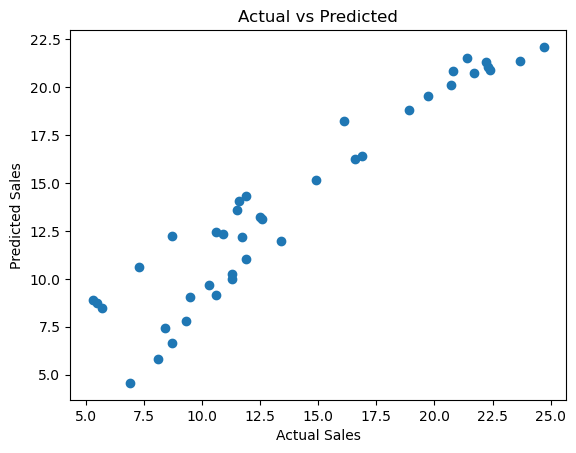

In [28]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()


## Predicting New data

In [43]:

# New advertising budget
new_data = pd.DataFrame({
    'TV': [150],
    'radio': [25],
    'newspaper': [20]
})

new_data


,TV,radio,newspaper
0,150,25,20


In [44]:

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 14.473593601116834


## ✅ Conclusion

Multiple Linear Regression helps us understand:

- Which advertising channel impacts sales the most
- How strongly each feature affects sales
- How well our model predicts unseen data